In [1]:
#imports
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
#professor code for plotting
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

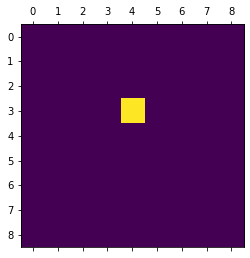

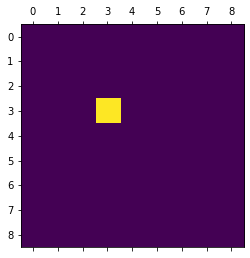

In [5]:
#where it needs fixing
#we can change if you would like how much or how little the placement of antibiotics is/color
#see stack overflow link for example
#need help combining to one board and making bacteria on the board
class board():
    def __init__(self, nrows = 9, ncols = 9):
        '''
        Initializes board with given rows and columns
        creates nutrients, anti, toxins, and bacteria private attributes
        currently initializes bacteria in column 0, could easily change later
        '''
        self.nrows = nrows
        self.ncols = ncols
        self._nutrients = np.zeros((self.nrows,self.ncols))
        self._anti = np.zeros((self.nrows,self.ncols))
        self._toxins = np.zeros((self.nrows,self.ncols))
        self._bacteria = np.full([self.nrows,self.ncols],"None")
        
        #currently initializes bacteria in column 0
        for y_val in range(nrows):
            self._bacteria[y_val,0] = bacteria(0,y_val)
        #print("nutrient initialization: (antibiotics and toxins have same init)")
        #print(self._nutrients)
        #print('\n')
        #print("bacteria locations:")
        #print(self._bacteria)
    
    def nutrients(self):
        '''
        displays nutrients attribute with random nonzero entry added
        '''
        a = np.random.randint(0,self.nrows)
        b = np.random.randint(0,self.ncols)
        self._nutrients[a][b] = np.random.random()
        #nutrients = nutrients.reshape((self.nrows, self.ncols))
        #row_labels = range(self.nrows)
        #col_labels = range(self.ncols)
        plt.matshow(self._nutrients)
        plt.xticks(range(self.ncols), range(self.ncols))
        plt.yticks(range(self.nrows), range(self.nrows))
        plt.show()
        return

    def antibiotics(self):
        '''
        displays antibiotics attribute with random nonzero entry added
        '''
        c = np.random.randint(0,self.nrows)
        d = np.random.randint(0,self.ncols)
        self._anti[c][d] = np.random.random()
        #anti = anti.reshape((self.nrows, self.ncols))
        #row_labels = range(self.nrows)
        #col_labels = range(self.ncols)
        plt.matshow(self._anti)
        plt.xticks(range(self.ncols), range(self.ncols))
        plt.yticks(range(self.nrows), range(self.nrows))
        plt.show()
        return
    
    def get_nutrients(self, x, y):
        '''
        returns nutrient value at point
        '''
        return self._nutrients[x,y]
    
    def get_antibiotics(self, x, y):
        '''
        returns antibiotic value at point
        '''
        return self._anti[x,y]
    
    def add_bacteria(self, x, y, to_add):
        '''
        adds a bacteria at point
        '''
        self._bacteria[x,y] = to_add
        return
        
    def toxins():#may take out
        pass
    
    def update(self):
        '''
        updates the board
        '''
        #currently only updates bacteria
        for row in range(self.nrows):
            for col in range(self.ncols):
                if self._bacteria[row,col] is not None:
                    check = self._bacteria[row,col].update()
                    if check:
                        self._bacteria[row,col] = None
                
    
    def display(self):
        '''
        displays the board
        '''
        #to be implemented, but this is where board's attributes are displayed to screen
        pass

c = board(9,9)
c.nutrients()
c.antibiotics()
#https://stackoverflow.com/questions/10194482/custom-matplotlib-plot-chess-board-like-table-with-colored-cells

In [36]:
class bacteria():
    
    __slots__ = ['x', 'y', 'antibiotic_resistance_gene', 'nutrient_gene', 'temperature_gene', 'immune_resistance_gene', 'mutation_rate', 'reproduction_rate']
    
    def __init__(self, x = random.randint(0,120),y = random.randint(0,120), gene_seed = 0, mutation_rate=0.1, reproduction_rate=0.1):
        """
        Creates new bacteria object with random position and genes
        :x: x position of bacteria
        :y: y position of bacteria
        :gene_seed: float value to add to all randomly initialized gene values
        :mutation_rate: the mutation rate for bacteria
        """
        self.x = x
        self.y = y
        self.mutation_rate = mutation_rate
        self.reproduction_rate = reproduction_rate
        #initialize all genes to random values between [0, 0.2] + gene_seed
        self.antibiotic_resistance_gene = np.random.rand()/5 + gene_seed
        self.nutrient_gene = np.random.rand()/5 + gene_seed
        self.temperature_gene = np.random.rand()/5 + gene_seed
        self.immune_resistance_gene = np.random.rand()/5 + gene_seed
        
    
    def set_position(self, x, y):
        """
        Sets the position of self using passed arguments
        """
        self.x = x
        self.y = y
        return
    
    def movement(self):
        """
        Randomly move bacteria up to two units in the x and y directions
        """
        randomstepx = random.randint(-2,2)
        randomstepy = random.randint(-2,2)
        self.x = self.x + randomstepx
        if self.x > 120:
            self.x = 120
        if self.x < 0:
            self.x = 0
        self.y = self.y + randomstepy
        if self.y > 120:
            self.y = 120
        if self.y < 0:
            self.y = 0
        return
    
    def reproduce(self):
        """
        Returns a new bacteria with a gene seed of the mean of the current bacterias genes
        """
        if np.random.rand() < self.reproduction_rate:
            newbac = bacteria(self.x,self.y, (self.antibiotic_resistance_gene+self.nutrient_gene+self.temperature_gene+self.immune_resistance_gene)/4)
            return newbac
        return None
    
    
    def mutate(self):
        """
        Randomly calculate if bacteria will mutate
        If true, randomly add from a N(0, 0.1) distribution
        genes mutate independently
        """
        if np.random.rand() < self.mutation_rate:
            self.antibiotic_resistance_gene += 0.1 * np.random.randn()
        if np.random.rand() < self.mutation_rate:
            self.nutrient_gene += 0.1 * np.random.randn()
        if np.random.rand() < self.mutation_rate:
            self.temperature_gene += 0.1 * np.random.randn()
        if np.random.rand() < self.mutation_rate:
            self.immune_resistance_gene += 0.1 * np.random.randn()
    
    def death(self, the_board):
        """
        Calculate something related to the current conditions the bacteria is experiencing to see if it dies based on its genes.
        :external_condition_value: could be anything such as temperature, antibiotics level, white blood cell count, etc
        """
        if self.antibiotic_resistance_gene < the_board.get_antibiotics(self.x,self.y):
            return True
        if self.nutrient_gene < the_board.get_nutrients(self.x,self.y):
            return True
        #implement temperature and immune resistance
        return False
    
    def update(self, the_board):
        '''
        updates a bacteria
        calls all other methods (movement, reproduce, mutate, death, etc)
        returns boolean for if bacteria has died
        '''
        if self.death(the_board):
            return (True, None)
        self.movement()
        self.mutate()
        return (False, self.reproduce())
    
    def draw(self):
        image_path = 'bacteria.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)
        return

#we may want to just use dots instead of the picture^^^

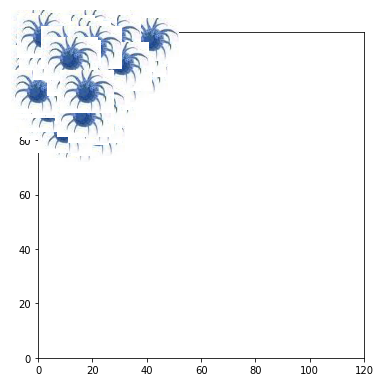

Total bacteria:  732


In [37]:
b = bacteria()
allbac = []
allbac.append(b)
c = board(121, 121)
for d in range(50):
    
    for b in allbac:
        dies, newbac = b.update(c)
        if newbac:
            allbac.append(newbac)
        
    
    
    
    
    
    ####Displays board#####
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    
    for ba in range(np.size(allbac)):
        allbac[ba].movement()
        allbac[ba].draw()
        #reproduction changed to happen above
#     if np.mod(d,10) == 1:
#         for i in range(np.size(allbac)):
#             cell = allbac[i].reproduce()
#             allbac.append(cell)
    plt.axes().set_aspect('equal')
    plt.axes().set_xlim([-0,120])
    plt.axes().set_ylim([-0,120])
    plt.show()
    time.sleep(0.001)  
print('Total bacteria: ', len(allbac))

In [54]:
height = 40
width = 40
iterations = 50
table = board(height, width)
print("bacteria locations:")
print(table._bacteria)

for i in range(iterations):
    table.update()

bacteria locations:
[['<__m' 'None' 'None' ... 'None' 'None' 'None']
 ['<__m' 'None' 'None' ... 'None' 'None' 'None']
 ['<__m' 'None' 'None' ... 'None' 'None' 'None']
 ...
 ['<__m' 'None' 'None' ... 'None' 'None' 'None']
 ['<__m' 'None' 'None' ... 'None' 'None' 'None']
 ['<__m' 'None' 'None' ... 'None' 'None' 'None']]
